# 1 Logistic Regression

## 1.1 Visualizing the data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('data/ex2data1.txt', delimiter=',')
# Print first five rows to see what it looks like
print(data[:5, :])

[[ 34.62365962  78.02469282   0.        ]
 [ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]]


In [3]:
X = data[:, 0:2] # scores on test1, test2
Y = data[:, 2] # admitted yes/no

print(X[:5])

[[ 34.62365962  78.02469282]
 [ 30.28671077  43.89499752]
 [ 35.84740877  72.90219803]
 [ 60.18259939  86.3085521 ]
 [ 79.03273605  75.34437644]]


In [4]:
print(Y[:5])

[ 0.  0.  0.  1.  1.]


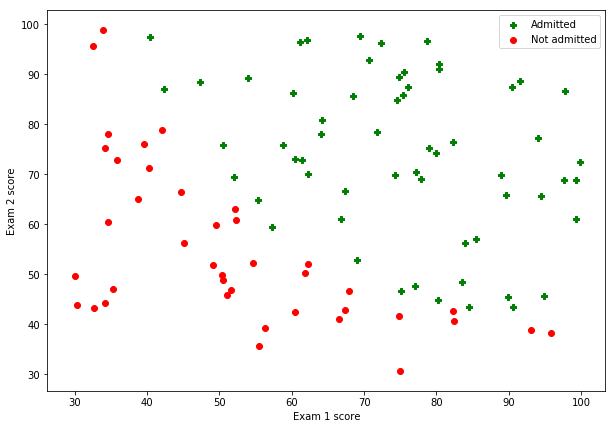

In [5]:
plt.figure(figsize=(10, 7))
plt.scatter(X[Y==1, 0], X[Y==1, 1], c='g', marker='P')
plt.scatter(X[Y==0, 0], X[Y==0, 1], c='r', marker='o')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted','Not admitted'])
plt.show()

## 1.2 Implementation

### 1.2.1 Warmup exercise: sigmoid function

In [6]:
import math

def sigmoid(z):
    g = 1. / (1. + math.exp(-z))
    return g

# Vectorize sigmoid function so it works on all elements of a numpy array
sigmoid = np.vectorize(sigmoid)

In [7]:
# Test sigmoid function
test = np.array([[0]])
sigmoid(test)

array([[ 0.5]])

In [8]:
sigmoid(0)

array(0.5)

In [9]:
test = np.array([[-10,-1], [0,0], [1,10]])
sigmoid(test)

array([[  4.53978687e-05,   2.68941421e-01],
       [  5.00000000e-01,   5.00000000e-01],
       [  7.31058579e-01,   9.99954602e-01]])

### 1.2.2 Cost function and gradient

In [10]:
# Setup the data matrix appropriately, and add ones for the intercept term
[m, n] = X.shape

In [11]:
# Add intercept term to X
X = np.column_stack((np.ones(m), X))

In [12]:
# Initialize fitting parameters
initial_theta = np.zeros([n + 1, 1])

In [13]:
def costFunction(theta, X, y):
    
    # Cost
    J = 0
    m = len(y)
    
    for i in range(m):
        z = np.dot(theta.T, X[i])
        J += -y[i]*math.log(sigmoid(z)) - (1 - y[i])*math.log((1 - sigmoid(z)))
    
    J = J/m
    
    # Gradient
    grad = np.zeros(theta.shape)
    
    for j in range(X.shape[1]):
        for i in range(m):
            z = np.dot(theta.T, X[i])
            grad[j] += (sigmoid(z) - y[i]) * X[i,j]
        grad[j] = grad[j]/m
    
    return J, grad

In [14]:
# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, Y)

print('Cost at initial theta (zeros):\n', cost)
print('Expected cost (approx):\n 0.693\n')
print('Gradient at initial theta (zeros):\n', grad)
print('\nExpected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

Cost at initial theta (zeros):
 0.69314718056
Expected cost (approx):
 0.693

Gradient at initial theta (zeros):
 [[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628



In [15]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, Y)

print('Cost at test theta (zeros):\n', cost)
print('Expected cost (approx):\n 0.218\n')
print('Gradient at test theta (zeros):\n', grad)
print('\nExpected gradients (approx):\n 0.043\t 2.566\t 2.647')

Cost at test theta (zeros):
 0.218330193827
Expected cost (approx):
 0.218

Gradient at test theta (zeros):
 [ 0.04290299  2.56623412  2.64679737]

Expected gradients (approx):
 0.043	 2.566	 2.647


### 1.2.3 Learning parameters using fminunc

We're supposed to use Octave's ```fminunc``` function for this. I can't find a python implementation of this, so let's use ```scipy.optimize.minimize(method='TNC')``` instead.

In [16]:
from scipy.optimize import minimize
res = minimize(fun=costFunction, x0=initial_theta, args=(X, Y), method='TNC', jac=True, options={'maxiter':400})
res

     fun: 0.20349770158947436
     jac: array([  8.75697940e-09,   6.43645929e-08,   4.71900562e-07])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 36
     nit: 17
  status: 0
 success: True
       x: array([-25.16131869,   0.20623159,   0.20147149])

In [17]:
theta = res.x

print('Cost at theta found by fmin_tnc:\n', res.fun)
print('Expected cost (approx):\n 0.203\n')
print('Theta:\n', res.x)
print('Expected theta (approx):\n -25.161\t 0.206\t 0.201')

Cost at theta found by fmin_tnc:
 0.203497701589
Expected cost (approx):
 0.203

Theta:
 [-25.16131869   0.20623159   0.20147149]
Expected theta (approx):
 -25.161	 0.206	 0.201


In [18]:
def plotDecisionBoundary(theta, X, Y):
  
    plt.figure(figsize=(10, 7))
    plt.scatter(X[Y==1, 1], X[Y==1, 2], c='g', marker='P')
    plt.scatter(X[Y==0, 1], X[Y==0, 2], c='r', marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    
    plot_x = [min(X[:,1]-2),  max(X[:,1])+2]
    plot_y = [(-1/theta[2])*(theta[1]*plot_x[0] + theta[0]), (-1/theta[2])*(theta[1]*plot_x[1] + theta[0])]
    plt.plot(plot_x, plot_y)
    
    plt.xlim(min(X[:,1]-2),max(X[:,1])+2)
    plt.ylim(min(X[:,2]-2),max(X[:,2])+2)
    plt.legend(['Decision boundary', 'Admitted', 'Not admitted'])
    plt.show()

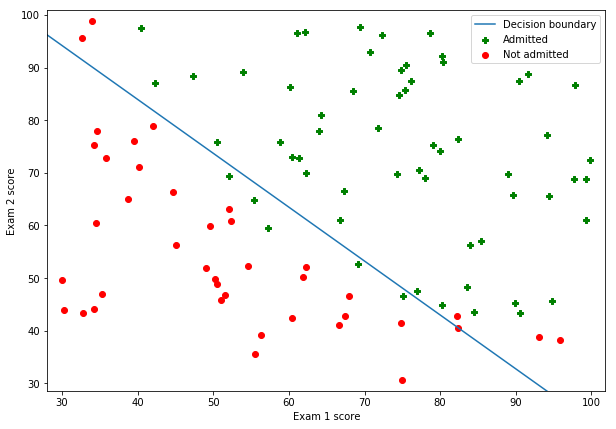

In [19]:
plotDecisionBoundary(theta, X, Y)

### 1.2.4 Evaluating logistic regression

In [20]:
# Predict probability of admission for a student with score 45 on exam 1 and score 85 on exam 2

prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85, we predict an admission probability of:\n', prob)
print('Expected value:\n 0.775 +/- 0.002\n\n')

For a student with scores 45 and 85, we predict an admission probability of:
 0.7762906253511527
Expected value:
 0.775 +/- 0.002




In [21]:
# Compute accuracy on our training set

def predict(theta, X):
    
    m = X.shape[0] # Number of training examples
    p = np.zeros(m)

    for i in range(m):
        prob = sigmoid(np.dot(X[i,:], theta))
        if prob >= 0.5:
            p[i] = 1 # Predict "Admitted" if prob >= 0.5
    
    return p

In [22]:
p = predict(theta, X)
accuracy = sum(p==Y) / m

print('Training accuracy:\n', accuracy * 100, '%')
print('Expected accuracy (approx):\n 89.0 %\n')

Training accuracy:
 89.0 %
Expected accuracy (approx):
 89.0 %

